# Market Basket Analysis using Apriori Algorithm
- Tried implementing apriori algorithm on a grocery data i found on kaggle (https://www.kaggle.com/roshansharma/market-basket-optimization)
- Data consist items bought per transaction only, no other details were provided
- Did not use mlxtend package
- reference i used: https://www.edureka.co/blog/apriori-algorithm/

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from itertools import permutations, combinations

## Load Data

In [3]:
df = pd.read_csv('Market_Basket.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove whitespaces to avoid duplicates
for col in df.columns:
    df[col] = df[col].str.strip()

## Data Preprocessing

In [5]:
# Make df a list of list of items
df_list = df.values.tolist()

In [6]:
# Count number of items per transaction
num_item_trans = []
for transaction in df_list:
    count = 0
    for item in transaction:
        if str(item) != 'nan':
            count += 1
    num_item_trans.append(count)

In [7]:
# Put all items in a list
all_items = []
for transaction in df_list:
    for item in transaction:
        if str(item) != 'nan':
            all_items.append(item)

In [15]:
# Get distinct items
list_items = list(set(all_items))
list_items.sort()
list_items

['almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashed potato',
 'ma

In [19]:
# Get shape of data
df.shape

(7501, 20)

## Association Rule Mining

In [18]:
# Get total transaction
total_transaction = df.shape[0]
print('Total number of transactions: ', total_transaction)

Total number of transactions:  7501


In [21]:
# Get total number of distinct items
num_distinct_items = len(list_items)
print('Total number of distinct items: ', num_distinct_items)

Total number of distinct items:  119


In [20]:
# Get average number of items per transaction
ave_num_items = len(all_items)/total_transaction
print('Average number of items per transaction: ', int(ave_num_items))

Average number of items per transaction:  3


Text(0.5, 1.0, 'Number of items bought per transaction')

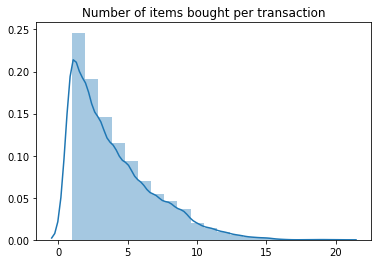

In [22]:
# Distribution plot of number of items bought per transaction
dplot = sns.distplot(num_item_trans, bins=20)
dplot.set_title('Number of items bought per transaction')

### Apriori Algorithm

    "Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. 
    It proceeds by identifying the frequent individual items in the database and extending them to larger and larger 
    item sets as long as those item sets appear sufficiently often in the database"

- #### First Iteration
    - Will only consider items that has 5% support or higher.

In [23]:
# Compute support for each item
count_list = []
for item in list_items:
    count = all_items.count(item)
    count_list.append(count)

item_support = pd.DataFrame(count_list, columns=['count'],index=list_items)
item_support['support'] = item_support['count']/total_transaction
item_support = item_support.sort_values(by=['support'], ascending=False)
item_support.reset_index(inplace=True)
item_support.columns = ['item', 'count', 'support']

In [24]:
# Extract items with support more than or equal to 0.10 
first_iteration = item_support[item_support['support'] >= 0.05]
first_iteration

,item,count,support
0,mineral water,1788,0.238368
1,eggs,1348,0.179709
2,spaghetti,1306,0.174110
3,french fries,1282,0.170911
4,chocolate,1230,0.163978
5,green tea,991,0.132116
6,milk,972,0.129583
7,ground beef,737,0.098254
8,frozen vegetables,715,0.095321
9,pancakes,713,0.095054


- #### Second Iteration
    - Get paired items
    - Will only consider paired items with support equal or more than 0.05

In [25]:
# Get items that complies with the condition on first iteration
top_items = list(first_iteration['item'])

In [81]:
def get_possible_permutations(items, k):
    '''
    Get possible permutations of the product k at a time.
    
    input: list, list of all items
    returns t
    '''
    perm_list = []
    for r in range(k, k+1):
        all_perm = permutations(items, r)
        for perm in all_perm:
            perm_list.append(list(perm))
    return perm_list

In [82]:
def get_possible_combinations(items, k):
    '''
    Get possible permutations of the product k at a time.
    
    input: list, list of all items
    returns t
    '''
    combo_list = []
    for r in range(k, k+1):
        all_combo = combinations(items, r)
        for combo in all_combo:
            combo_list.append(list(combo))
    return combo_list

In [28]:
def get_frequency(perm):
    '''
    Number of transactions such that:
    both the antecedent and consequent is present
    '''
    antecedent = perm[0]
    consequent = perm[1]
    count = 0
    for transaction in df_list:
        if (antecedent in transaction) and (consequent in transaction):
            count += 1
    return count

In [29]:
def get_count(perm):
    '''
    count of antecent and consequent items
    return: list [antecedent, consequent]
    '''
    
    count_paired = []
    antecedent = perm[0]
    consequent = perm[1]
    
    ant_count = int(first_iteration[first_iteration['item']==antecedent]['count'])
    cons_count = int(first_iteration[first_iteration['item']==consequent]['count'])
    count_paired.append(ant_count)
    count_paired.append(cons_count)
    
    return count_paired

In [83]:
# Create empty dataframe
second_iteration = result = pd.DataFrame()
# Get combinations (2) of the items
second_iteration['paired items'] = get_possible_combinations(top_items, 2)
# Get frequency of the paired items
second_iteration['paired item frequency'] = second_iteration['paired items'].apply(lambda combo: get_frequency(combo))
# Calculate for the support
second_iteration['support'] = second_iteration['paired item frequency']/total_transaction

In [84]:
# Extract paired items with support equal or more than 0.05
second_iteration = second_iteration[second_iteration['support'] >= 0.04]
second_iteration

,paired items,paired item frequency,support
0,"[mineral water, eggs]",382,0.050927
1,"[mineral water, spaghetti]",448,0.059725
3,"[mineral water, chocolate]",395,0.052660
5,"[mineral water, milk]",360,0.047994
6,"[mineral water, ground beef]",307,0.040928


In [95]:
paired_second = list(second_iteration['paired items'])
paired_second

[['mineral water', 'eggs'],
 ['mineral water', 'spaghetti'],
 ['mineral water', 'chocolate'],
 ['mineral water', 'milk'],
 ['mineral water', 'ground beef']]

### Pruning

In [39]:
# Get items from second iteration
second_list = list(second_iteration['paired items'])
second_items = []

for pair in second_list:
    for item in pair:
        if item not in second_items:
            second_items.append(item)

In [40]:
second_items

['mineral water', 'eggs', 'spaghetti', 'chocolate', 'milk', 'ground beef']

In [105]:
def check_itemset(list_itemset):
    '''
    Check whether paired list is 
    '''
    check = 0
    for itemset in list_itemset:
        if itemset not in paired_second:
            check += 1
    return check

In [106]:
# Create table for pruning process
prunning = pd.DataFrame()
# Get possible combinations of the items from the second iteration
prunning['three itemset'] = get_possible_combinations(second_items, 3)
# 
prunning['paired items'] = prunning['three itemset'].apply(lambda three_set: get_possible_combinations(three_set, 2))
prunning['is_in_2nd_iter'] = prunning['paired items'].apply(lambda paired_list: check_itemset(paired_list))

In [107]:
prunning

,three itemset,paired items,is_in_2nd_iter
0,"[mineral water, eggs, spaghetti]","[[mineral water, eggs], [mineral water, spaghe...",1
1,"[mineral water, eggs, chocolate]","[[mineral water, eggs], [mineral water, chocol...",1
2,"[mineral water, eggs, milk]","[[mineral water, eggs], [mineral water, milk],...",1
3,"[mineral water, eggs, ground beef]","[[mineral water, eggs], [mineral water, ground...",1
4,"[mineral water, spaghetti, chocolate]","[[mineral water, spaghetti], [mineral water, c...",1
5,"[mineral water, spaghetti, milk]","[[mineral water, spaghetti], [mineral water, m...",1
6,"[mineral water, spaghetti, ground beef]","[[mineral water, spaghetti], [mineral water, g...",1
7,"[mineral water, chocolate, milk]","[[mineral water, chocolate], [mineral water, m...",1
8,"[mineral water, chocolate, ground beef]","[[mineral water, chocolate], [mineral water, g...",1
9,"[mineral water, milk, ground beef]","[[mineral water, milk], [mineral water, ground...",1
